
# Jupyter notebook for the SBL package Spectral_domain_explorer

This notebook shows how to lauch the commands and comments on the outpout. It shows the quality plot obtained, but does not perform an interactive visualization of the structures -- which should be done with VMD or pymol. To run the notebook, a number of executables / scripts from the SBL must be available from one's PATH:   

* To find domains:
    * (package Spectral_domain_explorer) sbl-spectraldom.exe

* To perform flexible alignments
    * (package Kpax) : sbl-kpax.exe

* To compare the domains obtained against structural similarities identified by the flexible aligner Kpax:  
    * (package Molecular_distances_flexible) : sbl-rmsd-flexible-proteins-kpax.exe

* To reduce the fragmentation of domains using the D-family-matching algorithm
    * (package D_family_matching) : sbl-cmp-clust-dfam.exe



In [1]:
import os, subprocess
from SBL_pytools import SBL_pytools

py = subprocess.run("which python3", shell=True, stdout=subprocess.PIPE).stdout.decode('utf-8').strip()
spectraldom_run_exe = subprocess.run("which sbl-spectraldom-run.py", shell=True, stdout=subprocess.PIPE).stdout.decode('utf-8').strip()

# I. Example for the diffusion map (DM) mode

/user/esarti/home/mambaforge/envs/sbl_env/bin/python3 /user/esarti/home/projects/sbl-install/bin/sbl-spectraldom-run.py --pdb-fpath data/DB-molecular-motions/1wdn.pdb --load-chains A --output-dir 1ggg-1wdn
Pdb files found : 
Collected data/DB-molecular-motions/1wdn.pdb A

+++ Running spectraldom in mode Spectraldom_DM
Spectraldom mode DM/ENM: valid length and num residues are 223 223 residues
->Polypeptide_chain_contacts_finder...
...covalent_contacts num contacts 445
...non_covalent_contacts contacts with distance threshold 10.00 is 4148
->ENM::convert_contact_maps_to_triplets_ijstiff...
...stiffness CT_COV=10.00 : processing 445 contacts
...stiffness CT_NCOV=1.00 : processing 4148 contacts
...ENM check: num Calphas is 223
...ENM::fill_DM_weights_matrix_from_residue_contacts in stiffness mode Stiffness_mode_max, matrix size 223 x 223
End compute_graph with 223 vertices and 4148 edges
Spectral_clustering::compute_least_k_eigenvals
...Spectraldom: running  k_means for k = 2 3 4 5 6 7 8 

ls: cannot access '1ggg-1wdn/spectrus-clustering-1wdn-*k*.txt': No such file or directory
/user/esarti/home/mambaforge/envs/sbl_env/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2187.
  warnings.warn(


['/user/esarti/home/projects/sbl-install/bin/sbl-spectraldom.exe', '--kmin', '2', '--kmax', '10', '--dmax-contacts', '10', '--mode', 'DM', '--filename', 'data/DB-molecular-motions/1wdn.pdb', '--load-chains', 'A', '--stiffness-cov', '10', '--stiffness-ncov', '1', '--dzero', '4.5', '--output-dir', '1ggg-1wdn']
/user/esarti/home/projects/sbl-install/bin/sbl-spectraldom.exe --kmin 2 --kmax 10 --dmax-contacts 10 --mode DM --filename data/DB-molecular-motions/1wdn.pdb --load-chains A --stiffness-cov 10 --stiffness-ncov 1 --dzero 4.5 --output-dir 1ggg-1wdn


#i################################################################################
+++ Spectrus-run.py analysis...
#i################################################################################
K values for local maxima: [2, 5, 9]

Best clusterings are: ['1ggg-1wdn/spectraldom-clustering-1wdn-A-k2.txt', '1ggg-1wdn/spectraldom-clustering-1wdn-A-k5.txt', '1ggg-1wdn/spectraldom-clustering-1wdn-A-k9.txt']

=== Quality plot dumped:
	 okula

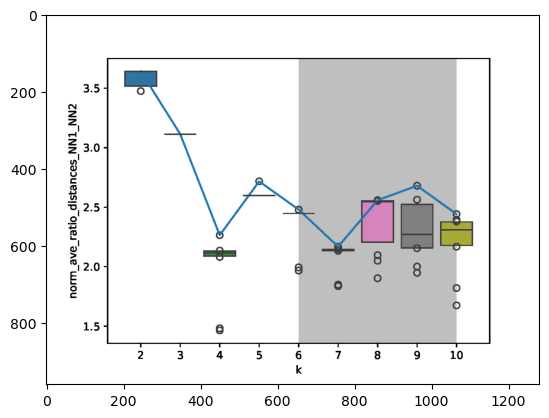

In [2]:
# We use sbl-spectraldom-run.py to run sbl-spectrus.exe on chain A of 1ggg.pdb
# NB: the script dumps the command invoking sbl-spectrus.exe 
cmd =  "%s %s --pdb-fpath data/DB-molecular-motions/1wdn.pdb --load-chains A --output-dir 1ggg-1wdn" % (py, spectraldom_run_exe)
#cmd = "sbl-spectrus-run.py --pdb-fpath data/DB-molecular-motions/1wdn.pdb --load-chains A --output-dir 1ggg-1wdn"
print(cmd)
os.system(cmd)

ofile = SBL_pytools.find_file_in_output_directory("quality-score-plot.pdf", "1ggg-1wdn")
print("Quality plot file:", ofile)
SBL_pytools.show_pdf_file(ofile, 200)

In [3]:
# Note that the  previous python command executes the following -- parameters removed when default options are used
# We re-execute the command and display the scores obtained
cmd = "sbl-spectraldom.exe --mode DM --filename data/DB-molecular-motions/1wdn.pdb --load-chains A --output-dir 1ggg-1wdn"

os.system(cmd)

SBL_pytools.show_txt_file("scores-best.csv", "1ggg-1wdn")

Pdb files found : 
Collected data/DB-molecular-motions/1wdn.pdb A

+++ Running spectraldom in mode Spectraldom_DM
Spectraldom mode DM/ENM: valid length and num residues are 223 223 residues
->Polypeptide_chain_contacts_finder...
...covalent_contacts num contacts 445
...non_covalent_contacts contacts with distance threshold 10.00 is 4148
->ENM::convert_contact_maps_to_triplets_ijstiff...
...stiffness CT_COV=10.00 : processing 445 contacts
...stiffness CT_NCOV=1.00 : processing 4148 contacts
...ENM check: num Calphas is 223
...ENM::fill_DM_weights_matrix_from_residue_contacts in stiffness mode Stiffness_mode_max, matrix size 223 x 223
End compute_graph with 223 vertices and 4148 edges
Spectral_clustering::compute_least_k_eigenvals
...Spectraldom: running  k_means for k = 2 3 4 5 6 7 8 9 10 
...Spectraldom: dumping scores /home/esarti/projects/sbl/Applications/Spectral_domain_explorer/demos/Spectral_domain_explorer/1ggg-1wdn/scores-best.csv
...Spectraldom: dumping scores /home/esarti/proj

...Total num of contacts irrespective of type is 4593


# II. Example for the  Multiple Sequence Alignment mode

/user/esarti/home/mambaforge/envs/sbl_env/bin/python3 /user/esarti/home/projects/sbl/scripts/sbl-pdb-align.py -f data/DB-molecular-motions/1ggg.pdb data/DB-molecular-motions/1wdn.pdb --chains A A --output-dir 1ggg-1wdn
pdb_id1ggg.pdb and chain A:
Sequence has length: 226 

pdb_id1wdn.pdb and chain A:
Sequence has length: 226 

+++Seq align with Bio.pairwise2 num alignments with scores: 1 [1164.0]
Dumped txt file 1ggg-1wdn/1ggg-1wdn.txt
Dumped fasta file  1ggg-1wdn/1ggg-1wdn.fasta

+++Struct align, num residues chain_1:220 chain_2:222 intersection:220
lRMSD for the id alignment using 220 residues: 5.34
Dumped file data/DB-molecular-motions/1wdn-aligned.pdb
PDB files:  data/DB-molecular-motions/1ggg.pdb data/DB-molecular-motions/1wdn-aligned.pdb
vmd -e 1ggg-1wdn/1ggg-A--1ggg-A.vmd

++Showing file 1ggg-1wdn/1ggg-1wdn.fasta
>data/DB-molecular-motions/1ggg.pdb_A
ADKKLVVATDTAFVPFEFKQGDLYVGFDVDLWAAIAKELKLDYELKPMDFSGIIPALQTKNVDLALAGITITDERKKAIDFSDGYYKSGLLVMVKANNNDVKSVKDLDGKVVAVKSGTGSVDYAKANIKT

ls: cannot access '1ggg-1wdn/spectrus-clustering-1ggg-*k*.txt': No such file or directory
/user/esarti/home/mambaforge/envs/sbl_env/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3924.
  warnings.warn(
/user/esarti/home/mambaforge/envs/sbl_env/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4004.
  warnings.warn(
ls: cannot access '1ggg-1wdn/spectrus-clustering-1wdn-*k*.txt': No such file or directory
/user/esarti/home/mambaforge/envs/sbl_env/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2187.
  warnings.warn(


['/user/esarti/home/projects/sbl-install/bin/sbl-spectraldom.exe', '--kmin', '2', '--kmax', '10', '--dmax-contacts', '10', '--mode', 'MSA', '--msa-fpath', '1ggg-1wdn/1ggg-1wdn.fasta', '--structures-fpath', '1ggg-1wdn/1ggg-1wdn.txt', '--output-dir', '1ggg-1wdn']
/user/esarti/home/projects/sbl-install/bin/sbl-spectraldom.exe --kmin 2 --kmax 10 --dmax-contacts 10 --mode MSA --msa-fpath 1ggg-1wdn/1ggg-1wdn.fasta --structures-fpath 1ggg-1wdn/1ggg-1wdn.txt --output-dir 1ggg-1wdn


#i################################################################################
+++ Spectrus-run.py analysis...
#i################################################################################
K values for local maxima: [2, 5, 9]

Best clusterings are: ['1ggg-1wdn/spectraldom-clustering-1ggg-A-k2.txt', '1ggg-1wdn/spectraldom-clustering-1ggg-A-k5.txt', '1ggg-1wdn/spectraldom-clustering-1ggg-A-k9.txt']

=== Quality plot dumped:
	 okular 1ggg-1wdn/1ggg-1wdn-quality-score-plot.pdf
pdb-list here: [('data/DB-molecul

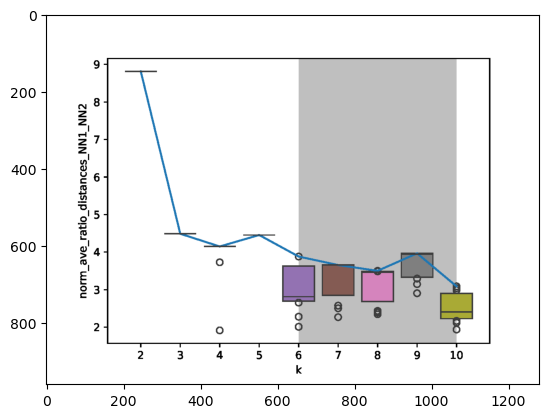

In [4]:
# 1. Align chains A of  and show the resulting FASTA file
pdb_align_exe = subprocess.run("which sbl-pdb-align.py", shell=True, stdout=subprocess.PIPE).stdout.decode('utf-8').strip()

cmd = "%s %s -f data/DB-molecular-motions/1ggg.pdb data/DB-molecular-motions/1wdn.pdb --chains A A --output-dir 1ggg-1wdn" % (py, pdb_align_exe)
print(cmd)
os.system(cmd)
SBL_pytools.show_txt_file( "1ggg-1wdn.fasta", "1ggg-1wdn")

# 2. Run spectrus
cmd = f"{py} {spectraldom_run_exe} --msa-fpath 1ggg-1wdn/1ggg-1wdn.fasta --structures-fpath 1ggg-1wdn/1ggg-1wdn.txt  --output-dir 1ggg-1wdn"
print(cmd)
os.system(cmd)

qplot = SBL_pytools.find_file_in_output_directory("quality-score-plot.pdf", "1ggg-1wdn")
print("Quality plot file:", qplot)
SBL_pytools.show_pdf_file(qplot, 200)

# Iterative alignment with Kpax: we align the same two chains with the flexible aligner Kpax

In [5]:
cmd = "sbl-kpax-iterative-alignment.exe -f data/DB-molecular-motions/1ggg.pdb -f data/DB-molecular-motions/1wdn.pdb --load-chains A --load-chains A -v 2"
os.system(cmd)

Running:  sbl-kpax-iterative-alignment.exe -f data/DB-molecular-motions/1ggg.pdb -f data/DB-molecular-motions/1wdn.pdb --load-chains A --load-chains A -v 2

Protein representation loader
Statistics:
Number of loaded PDB files: 2
Details for each file:
-- file 1 data/DB-molecular-motions/1ggg.pdb:
-- -- File exists: Yes
-- -- File is valid: Yes
-- -- Number of models: 1
-- -- Number of loaded atoms (of model with lowest index): 1714
-- -- Number of loaded SS bonds: 0
-- -- Number of discarded atoms based on model id (all models): 0
-- -- Number of discarded atoms based on chain id (all models): 1793
-- -- Number of discarded atoms based on b factor beeing too high (all models): 0
-- -- Number of discarded waters (all models): 159
-- -- Number of discarded hetatoms (all models): 159
-- -- Number of discarded hydrogens (all models): 0
-- -- Number of discarded alternate location atoms (all models): 0
-- -- Number of actually discarded atoms (all models): 1873
-- file 2 data/DB-molecular-m

Seeder_DP_score:alignment size:221


Statistics:
Alignment length: 164
Alignment score : 74.435674
Alignment identity percentage: 0.378049
Alignment similarity percentage: 0.445122
Alignment lRMSD : 3.275461
Alignment dRMSD : 2.395408

Report...

Ending module SBL::Modules::T_Alignment_structures_module...

End Run

General Statistics:

Times elapsed for computations (in seconds):
-- Iterative alignment: 0.279154
Total: 0.279154



0

# Combined lRMSD calculation: we use the domains identified to compute a combined RMSD. In comparing the obtained value against that of a flexible aligner such as Kpax, keep in mind that the number of residues
# taken into account is in general  much larger

In [ ]:
cmd="sbl-rmsd-flexible-proteins-kpax.exe  -f data/DB-molecular-motions/1ggg.pdb --domain-labels 1ggg-1wdn/domains-1ggg-A-k2.spec --load-chains A -f data/DB-molecular-motions/1wdn.pdb --domain-labels 1ggg-1wdn/domains-1wdn-A-k2.spec --load-chains A --directory-output 1ggg-1wdn"
os.system(cmd)
SBL_pytools.show_txt_file("rmsd-flexible-proteins-kpax__labels_lrmsd.txt", "1ggg-1wdn")


# III. Reducing fragmentation
* We show how to reduce fragmentation using sbl-spectrus-defrag.py

In [ ]:
defrag_exe = subprocess.run("which sbl-spectraldom-defrag.py", shell=True, stdout=subprocess.PIPE).stdout.decode('utf-8').strip()

cmd = f"%s %s -r 1ggg-1wdn -s data/DB-molecular-motions/1wdn.pdb -c A" % (py, defrag_exe)
os.system(cmd)